In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [67]:

# Load the wine quality dataset
Dataset = pd.read_csv('/content/1. winequality.csv')
print(Dataset.head())  # Display the first five rows of the dataset


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  good color  
0      9.4        5     0   red  
1      9.8        

In [68]:
# Define the target variable
target_variable = 'color'

# Separate the features and the target variable
X = Dataset.drop(columns=[target_variable])  # Features
y = Dataset[target_variable]  # Target variable


In [64]:
print(y)

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: color, Length: 6497, dtype: object


In [65]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [69]:

# Step 1: Handling Missing Values (NaN Imputation)
df=X
# Impute missing values with the mean
df.fillna(df.mean(), inplace=True)

In [70]:

# Explore the data
df.info()  # Display information about columns
df.describe().T  # Display descriptive statistical measures


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


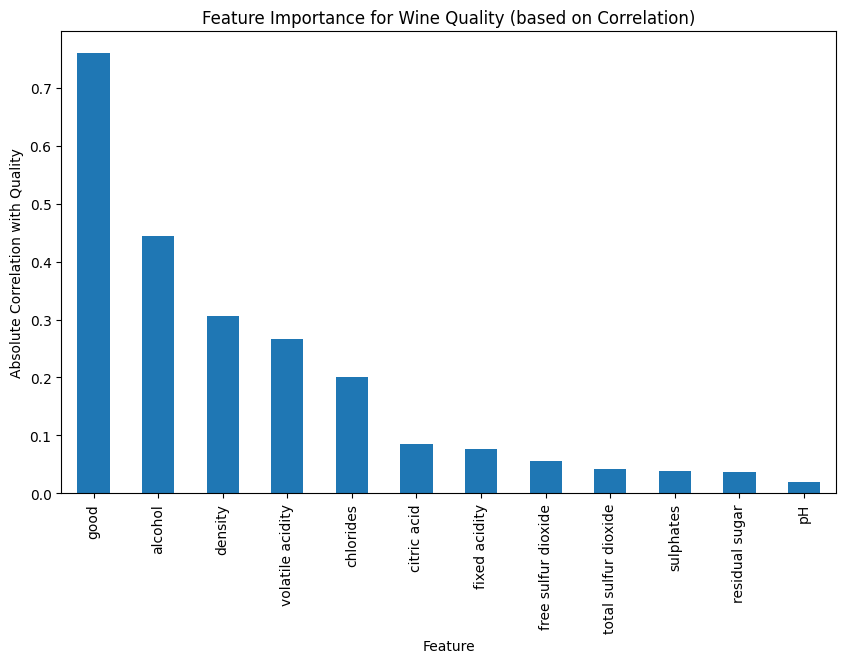

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Sort the features by their correlation with the target variable (quality in this case)
sorted_correlations = correlation_matrix['quality'].abs().sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sorted_correlations.drop('quality').plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Absolute Correlation with Quality')
plt.title('Feature Importance for Wine Quality (based on Correlation)')
plt.show()


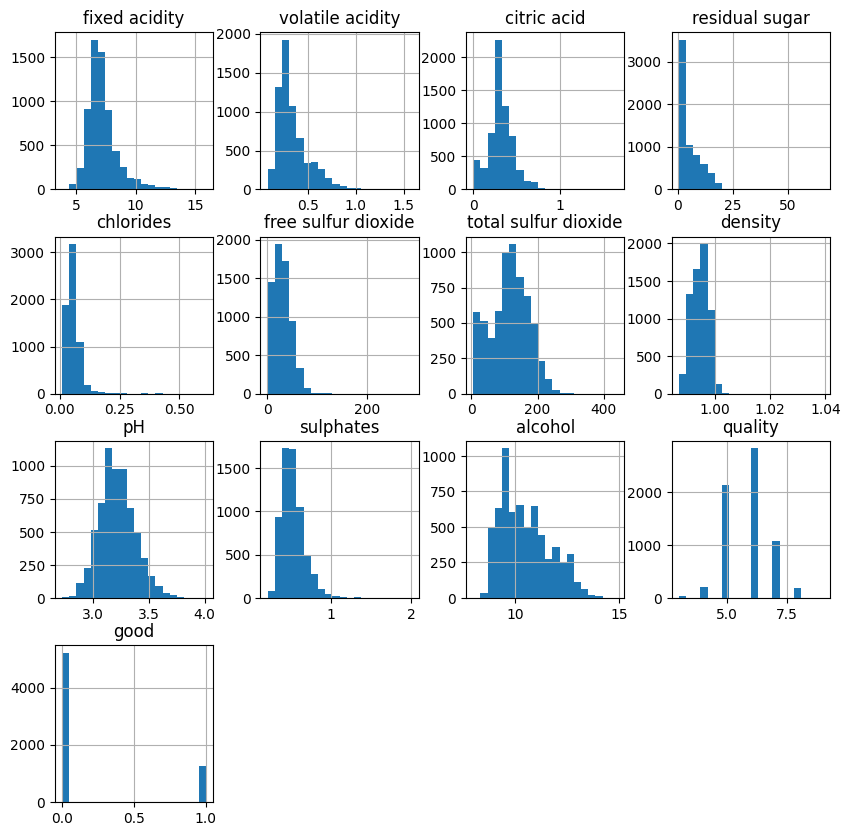

In [72]:

# Visualize data distribution
df.hist(bins=20, figsize=(10, 10))
plt.show()  # Draw histograms for continuous data columns


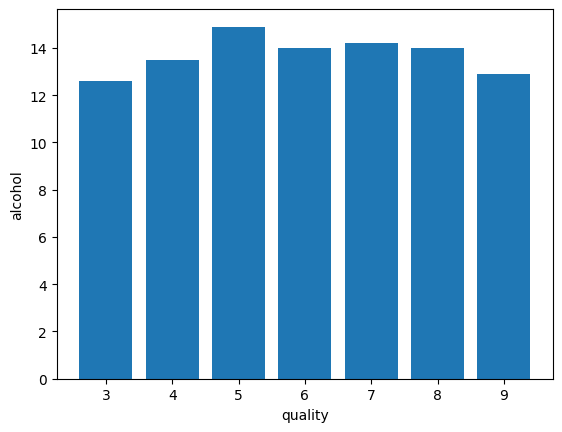

In [35]:

# Visualize data for each quality of wine
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()  # Draw a count plot for each quality of wine


In [73]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to exclude from normalization
columns_to_exclude = ['color']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric features in your DataFrame
numeric_columns = [col for col in df.columns if col not in columns_to_exclude]
df_normalized = df.copy()  # Create a copy of the DataFrame to preserve the original data
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])


print(df_normalized.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  good  
0  0.202899  0.333333   0.

In [74]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the target variable
y_encoded = label_encoder.fit_transform(y)

In [76]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a testing set (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df_normalized, y_encoded, test_size=0.2, random_state=42)



In [77]:
# Initialize the classifiers
rf_classifier = RandomForestClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Train the Decision Tree Classifier
dt_classifier.fit(X_train, y_train)

# Train the K-Nearest Neighbors Classifier
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
from sklearn.metrics import accuracy_score, f1_score

# Predict with the trained classifiers on the test data
rf_predictions = rf_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)

# Calculate accuracy and F1 score for each classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions, average='weighted')

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_f1_score = f1_score(y_test, knn_predictions, average='weighted')

# Print the accuracy and F1 score for each classifier
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest Classifier F1 Score: {rf_f1_score:.2f}")

print(f"Decision Tree Classifier Accuracy: {dt_accuracy:.2f}")
print(f"Decision Tree Classifier F1 Score: {dt_f1_score:.2f}")

print(f"K-Nearest Neighbors Classifier Accuracy: {knn_accuracy:.2f}")
print(f"K-Nearest Neighbors Classifier F1 Score: {knn_f1_score:.2f}")


Random Forest Classifier Accuracy: 0.99
Random Forest Classifier F1 Score: 0.99
Decision Tree Classifier Accuracy: 0.98
Decision Tree Classifier F1 Score: 0.98
K-Nearest Neighbors Classifier Accuracy: 0.99
K-Nearest Neighbors Classifier F1 Score: 0.99


In [79]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute ROC and AUC for Random Forest Classifier
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Compute ROC and AUC for Decision Tree Classifier
dt_probabilities = dt_classifier.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probabilities)
dt_roc_auc = auc(dt_fpr, dt_tpr)

# Compute ROC and AUC for K-Nearest Neighbors Classifier
knn_probabilities = knn_classifier.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probabilities)
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Compute precision-recall curve for Random Forest Classifier
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probabilities)

# Compute precision-recall curve for Decision Tree Classifier
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probabilities)

# Compute precision-recall curve for K-Nearest Neighbors Classifier
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probabilities)

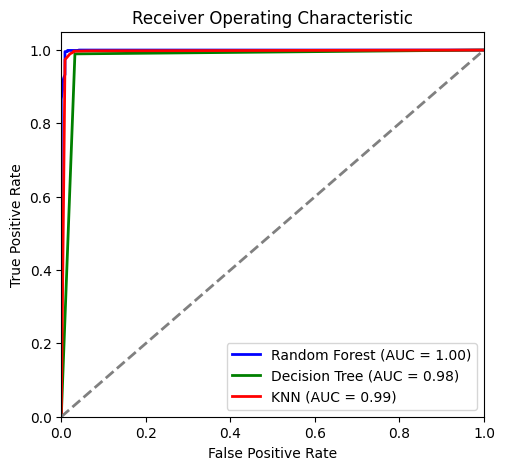

In [80]:


# Plot ROC curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % dt_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='red', lw=2, label='KNN (AUC = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')


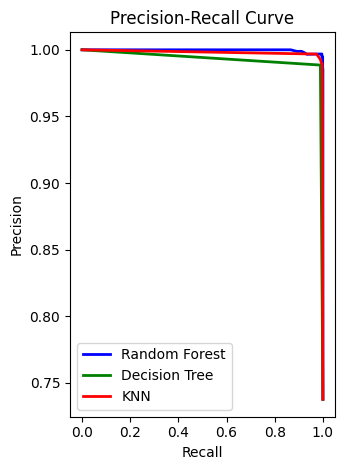

In [81]:

# Plot Precision-Recall curves
plt.subplot(1, 2, 2)
plt.plot(rf_recall, rf_precision, color='blue', lw=2, label='Random Forest')
plt.plot(dt_recall, dt_precision, color='green', lw=2, label='Decision Tree')
plt.plot(knn_recall, knn_precision, color='red', lw=2, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
